# **HW5**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift

Download required images to the colab working directory

In [ ]:
!gdown --id 1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
!gdown --id 1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
!gdown --id 14zOA1aCwo4lneA1jETn8OdSmGe266amB
!gdown --id 1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
!gdown --id 1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
!gdown --id 1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-

Downloading...
From: https://drive.google.com/uc?id=1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
To: /content/image1.jpg
100% 94.8k/94.8k [00:00<00:00, 3.03MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
To: /content/h.bmp
100% 343k/343k [00:00<00:00, 5.35MB/s]
Downloading...
From: https://drive.google.com/uc?id=14zOA1aCwo4lneA1jETn8OdSmGe266amB
To: /content/image2.jpg
100% 98.7k/98.7k [00:00<00:00, 3.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
To: /content/image3.jpg
100% 8.40k/8.40k [00:00<00:00, 6.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
To: /content/image4.bmp
100% 30.1k/30.1k [00:00<00:00, 4.37MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-
To: /content/image5.jpg
100% 13.5k/13.5k [00:00<00:00, 21.7MB/s]


Q1

In [ ]:
def image_restoration(img, h):
    '''
    perform image restoration
    inputs: 
        img(ndarray): input RGB image
        h(ndarray): Binary image of camera movement
    outputs:
        output(ndarray): restored image
    '''
    #################
    # start your code
    h_nor = h / np.sum(h)
    H = fft2(ifftshift(h_nor))

    
    G = np.zeros_like(img,dtype=np.complex_)
    Fhat = np.zeros_like(img,dtype=np.complex_)
    f = np.zeros_like(img,dtype=np.uint8)

    
    K =0.00075
    T = np.conj(H) / (np.square(np.abs(H)) + K)

    
    for i in range(3):
        G[:,:,i] = fft2(img[:,:,i])
        Fhat[:,:,i] = G[:,:,i] * T
        f[:,:,i] = np.abs(ifft2(Fhat[:,:,i]))

    
    # end your code
    ################
    
    
    return f

**don't change next cell (run for test)**

Text(0.5, 1.0, 'restored image')

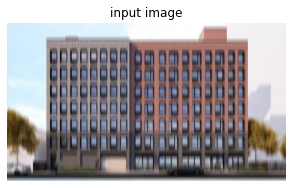

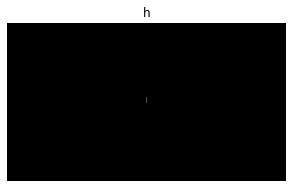

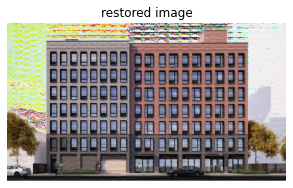

In [ ]:
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h = cv2.imread('h.bmp')
h = cv2.cvtColor(h,cv2.COLOR_BGR2GRAY)
output = image_restoration(img,h)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(h,cmap='gray')
plt.axis('off')
plt.title('h')
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('restored image')

Q2-part2

In [ ]:
def smoothing(img):
  '''
  perform image smoothing
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    output (ndarray) : smoothed image
  '''
  output = img.copy()

  ####################
  # start of your code

  output = cv2.GaussianBlur(img, (5, 5), 1.4)
  # end of your code
  ####################
  return output

In [ ]:
def comput_gradient(img):

  '''
  compute image gradiend magnitude and angle
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
  '''

  mag = np.zeros_like(img)
  angle = np.zeros_like(img)
  ####################
  # start of your code
  gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
  gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
     
    
  mag = np.sqrt(gx **2 + gy**2)
  angle = np.arctan2(gy,gx) * 180 / np.pi

  # end of your code
  ####################


  return mag,angle

In [ ]:
def NMS(mag,angle):
  '''
  perform non-maximum suppression
  **you should Not use libraries here**

  inputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
    
  outputs :
    output (ndarray) : one-pixel width edges
  '''
  output = mag.copy()
  ####################
  # start of your code
  ang = angle
  height, width = mag.shape
      
    
  for i_x in range(width):
        for i_y in range(height):  
            grad_ang = abs(ang[i_y, i_x])
            if grad_ang<= 22.5:
                neighb_indexes = [[i_x-1, i_y],[i_x + 1, i_y]]
                
             
   
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_indexes = [[i_x-1, i_y-1],[i_x + 1, i_y + 1]]
             

            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_indexes = [[i_x, i_y-1],[i_x, i_y + 1]]
                
             
  
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_indexes = [[i_x-1, i_y + 1],[i_x + 1, i_y-1]]
                
             
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_indexes = [[i_x-1, i_y],[i_x + 1, i_y]]
                
              
            # Non-maximum suppression step
            if width>neighb_indexes[0][0]>= 0 and height>neighb_indexes[0][1]>= 0:
                if mag[i_y, i_x]<mag[neighb_indexes[0][1], neighb_indexes[0][0]]:
                    mag[i_y, i_x]= 0
                    continue
  
            if width>neighb_indexes[1][0]>= 0 and height>neighb_indexes[1][1]>= 0:
                if mag[i_y, i_x]<mag[neighb_indexes[1][1], neighb_indexes[1][0]]:
                    mag[i_y, i_x]= 0

  output = mag
  

  # end of your code
  ####################

  return output

In [ ]:
def recursive(img,x,y):
    for i in range(-1,2):
        for j in range(-1,2):
            if img.shape[1]>x + j>=0 and img.shape[0]>y + i>=0:
                if img[y + i,x + j] == 125:
                    img[y + i,x + j] = 255
                    recursive(img,x+j,y+i)

In [ ]:
def hysteresis_threshold(edges,min_th,max_th):
  '''
  perform two-steps threshold
  **you should Not use libraries here**

  inputs :
    edges (ndarray) : edges of image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
    
  outputs :
    output (ndarray) : final edge image
  '''
  output = edges.copy()
  ####################
  # start of your code
  weak_ids = np.zeros_like(edges)
  strong_ids = np.zeros_like(edges)             
  ids = np.zeros_like(edges)
      
   
  for i_x in range(edges.shape[1]):
      for i_y in range(edges.shape[0]):
             
          grad_mag = edges[i_y, i_x]
             
          if grad_mag<min_th:
              ids[i_y, i_x]= 0
          elif max_th>grad_mag>= min_th:
              ids[i_y, i_x]= 125
          else:
              ids[i_y, i_x]= 255

  Ys,Xs = np.where(ids==255)
  for i in range(len(Ys)):
    recursive(ids,Xs[i],Ys[i])
  Ys,Xs = np.where(ids==125)
  ids[Ys,Xs] = 0
  output = ids

  # end of your code
  ####################

  return output

In [ ]:
def canny(img,min_th = 40,max_th=200):
  smooth_img = smoothing(img)
  mag,angle = comput_gradient(smooth_img)
  edges = NMS(mag,angle)
  final_edges = hysteresis_threshold(edges,min_th,max_th)
  return final_edges

In [ ]:
def openCV_Canny(img,min_th,max_th):
  '''
  use opencv to get canny edges
  
  inputs:
    img (ndarray): input grayscale image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
  outputs:
    cv2_canny (ndarray) : final edges

  '''

  cv2_canny = np.zeros_like(img)
  ####################
  # start of your code

  cv2_canny =  cv2.Canny(img,min_th,max_th)
  # end of your code
  ####################


  return cv2_canny

**don't change next cell (run for test)**

Text(0.5, 1.0, 'OpenCV Canny')

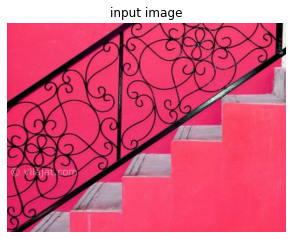

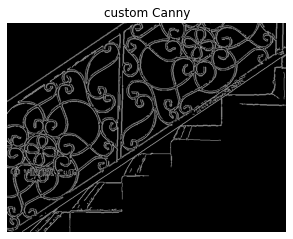

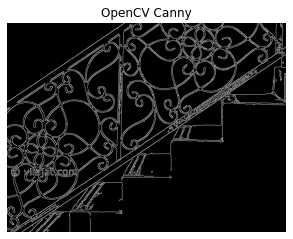

In [ ]:
img = img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
min_th,max_th = 40,125
edges = canny(image_g,min_th,max_th)
edges_opencv = openCV_Canny(image_g,min_th,max_th)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.title('custom Canny')
plt.figure(figsize=(5,5))
plt.imshow(edges_opencv,cmap='gray')
plt.axis('off')
plt.title('OpenCV Canny')

Q3-part2

In [ ]:
# compute proper number of iterations
iterations = 0
def circle_RANSAC(edges):
  '''
  modify RANSAC algorithm to find two circles params
  **you should NOT use libraries here**
  
  inputs:
    edges (ndarray): edges of image
    
  outputs:
    X0s (list) : x location of centers(center of circle)
    Y0s (list) : y location of centers(center of circle)
    rs (list) : raduis of circles

  '''
  global iterations
  x0s = []
  y0s = []
  rs = []

  TOLERANCE = 5  # Distance Tolerance
  THRESH = 0.20  # Required No. of Inliers to Accept a Model
  MAX_ITER = 2000  # As the name suggests!

  ####################
  # start of your code
  
  # end of your code
  ####################

  return x0s, y0s, rs

**don't change next cell (run for test)**

iterations : 26.21057415813467
count 144.0
{255}
num points 144
151 151 81
144 144 6
ss {255}
138 138
num points 138
131 90 41


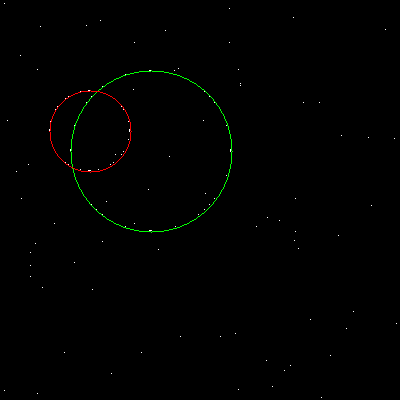

In [ ]:
import numpy as np
import cv2
from math import sqrt
from google.colab.patches import cv2_imshow

class RANSAC:
    def __init__(self,mask,iterations):
        self.iterations = iterations
        self.Xs,self.Ys  = np.where(mask >0)
        self.mask = mask


    def run(self):
        num_points = np.arange(len(self.Xs))
        print('num points',len(num_points))
        inliers = []
        final_a,final_b,final_r = 0,0,0
        for _ in range(self.iterations):
            idx = np.random.choice(num_points,3,replace=False)
            a,b,r = self.findCircle(self.Xs[idx[0]],self.Ys[idx[0]],self.Xs[idx[1]],self.Ys[idx[1]],self.Xs[idx[2]],self.Ys[idx[2]])
            temp = self.check_inlier(a,b,r,eps=5)
            if len(inliers) < len(temp):
                inliers = temp
                final_a, final_b, final_r = a,b,r

        return inliers,final_a,final_b,final_r








    def check_inlier(self,a,b,r,eps):
        inliers = []
        for i in range(len(self.Xs)):
            if np.abs((self.Xs[i] - a)** 2 + (self.Ys[i] - b)**2 - r**2) <= eps :
                inliers.append(i)

        return inliers







    def findCircle(self,x1, y1, x2, y2, x3, y3):
        x12 = x1 - x2
        x13 = x1 - x3

        y12 = y1 - y2
        y13 = y1 - y3

        y31 = y3 - y1
        y21 = y2 - y1

        x31 = x3 - x1
        x21 = x2 - x1

        # x1^2 - x3^2
        sx13 = pow(x1, 2) - pow(x3, 2)

        # y1^2 - y3^2
        sy13 = pow(y1, 2) - pow(y3, 2)

        sx21 = pow(x2, 2) - pow(x1, 2)
        sy21 = pow(y2, 2) - pow(y1, 2)

        f = (((sx13) * (x12) + (sy13) *
              (x12) + (sx21) * (x13) +
              (sy21) * (x13)) // (2 *
                                  ((y31) * (x12) - (y21) * (x13))))

        g = (((sx13) * (y12) + (sy13) * (y12) +
              (sx21) * (y13) + (sy21) * (y13)) //
             (2 * ((x31) * (y12) - (x21) * (y13))))

        c = (-pow(x1, 2) - pow(y1, 2) -
             2 * g * x1 - 2 * f * y1)

        # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
        # where centre is (h = -g, k = -f) and
        # radius r as r^2 = h^2 + k^2 - c
        h = -g
        k = -f
        sqr_of_r = h * h + k * k - c

        # r is the radius
        r = round(sqrt(sqr_of_r), 5)

        return h,k,int(r)


    def draw(self,img,a,b,r,color=(0,255,0)):
        if len(img.shape) < 3:
            image = cv2.merge([img,img,img])
        else:
            image = img.copy()
        cv2.circle(image, (b,a), r, color, 1)
        return image


img = cv2.imread('image3.bmp',0)


print('iterations :',(np.log10(1 - 0.9999))/np.log10( 1 - (2/3)**3))
print('count',np.sum(img)/255)

Xs,Ys = np.where(img >0)
ss = set()
for i in range(len(Xs)):
    ss.add(img[Xs[i],Ys[i]])
print(ss)
ransac = RANSAC(img,iterations=100)
inliers,a,b,r = ransac.run()
image = ransac.draw(img,a,b,r)
print(a,b,r)
print(len(ransac.Xs),len(ransac.Ys),len(inliers))
xs = ransac.Xs
ys = ransac.Ys.tolist()
for inlier in reversed(inliers):
    xs = np.delete(xs,inlier)
    ys = np.delete(ys,inlier)
    #ys.remove(ys[inlier])
ransac.Xs = xs
ransac.Ys = ys



print('ss',ss)
print(len(ransac.Xs),len(ransac.Ys))
ransac.iterations = 200
inliers,a,b,r = ransac.run()
print(a,b,r)
image = ransac.draw(image,a,b,r,color=(0,0,255))

#cv2.imwrite('ans_part3.jpg',image)
cv2_imshow(image)




Q4-part3

In [ ]:
def opencv_houghCircles(img):
  '''
  use hough transform to find circle location
  **you should NOT use libraries here**
  
  inputs:
    img (ndarray): input RGB image
    
  outputs:
    output (ndarray): outout image which is input image with green lines on circles

  '''

  output = np.zeros_like(img)
  ####################
  # start of your code
  Ig = cv2.GaussianBlur(img, (3,3), 0)
  Ig = cv2.cvtColor(Ig, cv2.COLOR_RGB2GRAY)
  

  circles = cv2.HoughCircles(Ig, cv2.HOUGH_GRADIENT, dp = 1, minDist = 20, param1=150,param2=20,minRadius=0,maxRadius=100)
  for c in circles[0,:]:
      cv2.circle(img,(c[0],c[1]), np.int(c[2]), (0,255,0),2)

  output = img
  # end of your code
  ####################



  return output

**don't change next cell (run for test)**

Text(0.5, 1.0, 'OpenCV hough circles')

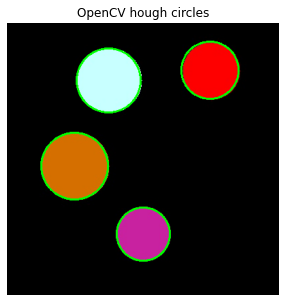

In [ ]:
img = cv2.imread('image5.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = opencv_houghCircles(img)
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('OpenCV hough circles') 